# Biodiversity Data Analysis Assignment

Data Analysis of species by National Park, Scientific names and Conservation Status.

## Overview

1.   Import Libraries
1.   Load the Data
1.   Data Exploration
1.   Cleaning the Data
2.   Processing the Data
6.   Data Analysis


In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the Data

In [3]:
observation = pd.read_csv('/content/observations.csv')
species = pd.read_csv('/content/species_info.csv')

## 3. Data Exploration

### 3.1. Analysing 'Observation'

In [4]:
# What columns do we have?

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# What is the shape of the Dataset?

observation.shape

(23296, 3)

In [6]:
# Is there any null value?

observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [7]:
# How is the distribution of the  quantitative values?

observation.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [8]:
# How many parks we are working with?

observation['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [9]:
# How many values we have per park?

observation.groupby(['park_name']).count()

,scientific_name,observations
park_name,,
Bryce National Park,5824,5824
Great Smoky Mountains National Park,5824,5824
Yellowstone National Park,5824,5824
Yosemite National Park,5824,5824


### 3.2. Analysing 'Species'

In [10]:
# What columns do we have?

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [11]:
# What is the shape ofthe Dataset?

species.shape

(5824, 4)

In [12]:
# Is there any null values?

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [13]:
# What kind od species we are working with?

species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [14]:
# What is conservaton status of these species?

species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [15]:
# How many values do we have per conservation status?

species['conservation_status'].value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [16]:
# How many values (Observation) we have per category?

species['category'].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

## 4. Cleaning the Data

### 4.1. Cleaning 'Oservation'

In [17]:
# Duplicate scientific name & park name.

observation[observation.duplicated(subset = ['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [18]:
observation[observation.scientific_name == 'Agrostis gigantea']

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,253
483,Agrostis gigantea,Yellowstone National Park,235
6824,Agrostis gigantea,Bryce National Park,104
7763,Agrostis gigantea,Great Smoky Mountains National Park,93
8676,Agrostis gigantea,Bryce National Park,116
11602,Agrostis gigantea,Great Smoky Mountains National Park,57
13907,Agrostis gigantea,Yosemite National Park,148
17535,Agrostis gigantea,Yosemite National Park,128


In [19]:
observation[observation.scientific_name == 'Rumex crispus']

,scientific_name,park_name,observations
308,Rumex crispus,Yellowstone National Park,256
945,Rumex crispus,Yellowstone National Park,255
1637,Rumex crispus,Bryce National Park,57
1712,Rumex crispus,Yosemite National Park,174
3485,Rumex crispus,Yosemite National Park,176
19502,Rumex crispus,Bryce National Park,129
22174,Rumex crispus,Great Smoky Mountains National Park,74
22293,Rumex crispus,Great Smoky Mountains National Park,91


In [20]:
# Group by Scientific name and Park name, And created a new colmn with the sum of the observation.
# In this way , The duplicate value will be only one row.

observation['total'] = observation.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
 3   total            23296 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 728.1+ KB


In [21]:
observation.head()

,scientific_name,park_name,observations,total
0,Vicia benghalensis,Great Smoky Mountains National Park,68,68
1,Neovison vison,Great Smoky Mountains National Park,77,77
2,Prunus subcordata,Yosemite National Park,138,138
3,Abutilon theophrasti,Bryce National Park,84,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85,85


In [22]:
# What if we called duplicate value that we have

observation[observation.scientific_name == 'Agrostis gigantea']

,scientific_name,park_name,observations,total
449,Agrostis gigantea,Yellowstone National Park,253,488
483,Agrostis gigantea,Yellowstone National Park,235,488
6824,Agrostis gigantea,Bryce National Park,104,220
7763,Agrostis gigantea,Great Smoky Mountains National Park,93,150
8676,Agrostis gigantea,Bryce National Park,116,220
11602,Agrostis gigantea,Great Smoky Mountains National Park,57,150
13907,Agrostis gigantea,Yosemite National Park,148,276
17535,Agrostis gigantea,Yosemite National Park,128,276


In [23]:
# Droping the duplicate

observation.drop_duplicates(subset = ['scientific_name','park_name'], keep='last', inplace=True)

In [24]:
# Hoe its look after drop duplicate

observation[observation.scientific_name == 'Agrostis gigantea']

,scientific_name,park_name,observations,total
483,Agrostis gigantea,Yellowstone National Park,235,488
8676,Agrostis gigantea,Bryce National Park,116,220
11602,Agrostis gigantea,Great Smoky Mountains National Park,57,150
17535,Agrostis gigantea,Yosemite National Park,128,276


In [25]:
# We keep only the colmns we want

observation = observation[['scientific_name', 'park_name', 'total']]
observation.head(10)

,scientific_name,park_name,total
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [26]:
# Renaming the column

observation = observation.rename(columns = {'total':'Observation'})
observation.head(10)

,scientific_name,park_name,Observation
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


### 4.2. Cleaning 'Species'

In [27]:
# Duplicated scientific name

species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [28]:
# Canis lupus is three times

species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [29]:
# Removing Duplicates

species.drop_duplicates(subset=['scientific_name'], keep = 'last', inplace = True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


## Processing the Data

In [30]:
# Merging the tables

observation = pd.merge(observation, species, left_on = 'scientific_name', right_on='scientific_name', how = 'left')
observation.head(10)

,scientific_name,park_name,Observation,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,Virginia Wildrye,NaN
6,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,"Big Squirreltail, Big Wild Rye",NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,Whorled Loosestrife,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,NaN


In [31]:
# Selecting the columns

observation = observation[['scientific_name','park_name','Observation','category','conservation_status']]
observation.head(10)

,scientific_name,park_name,Observation,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,NaN
6,Spizella pusilla,Yellowstone National Park,228,Bird,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,NaN


In [32]:
observation['category'].value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [33]:
observation['conservation_status'].value_counts()

Species of Concern    604
Endangered             60
Threatened             40
In Recovery            12
Name: conservation_status, dtype: int64

## 6. Data Analysis

### What is the category with the biggest observation?

Text(0.5, 1.0, 'Number of Observation by Category')

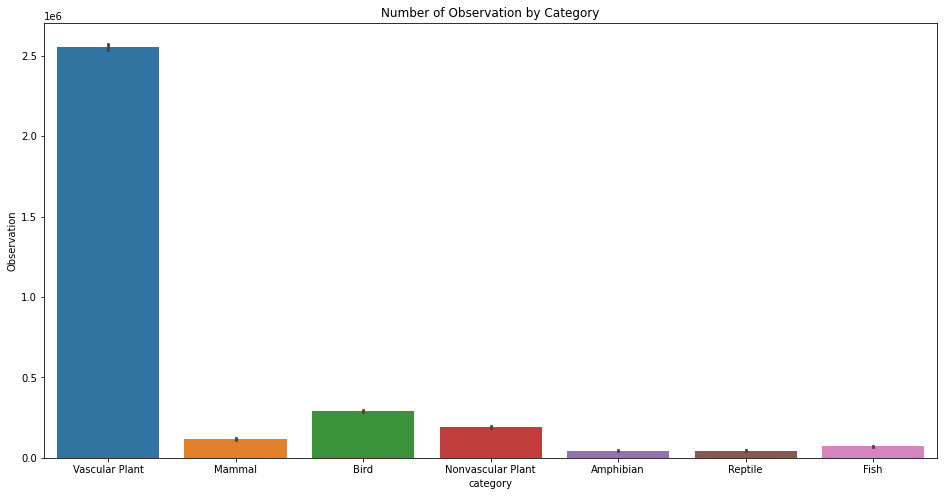

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'category', y = 'Observation', data = observation, estimator = np.sum)
plt.title('Number of Observation by Category')

### What is the park with the biggest observation by category?

Text(0.5, 1.0, 'Number of Observation for each Categories by Park')

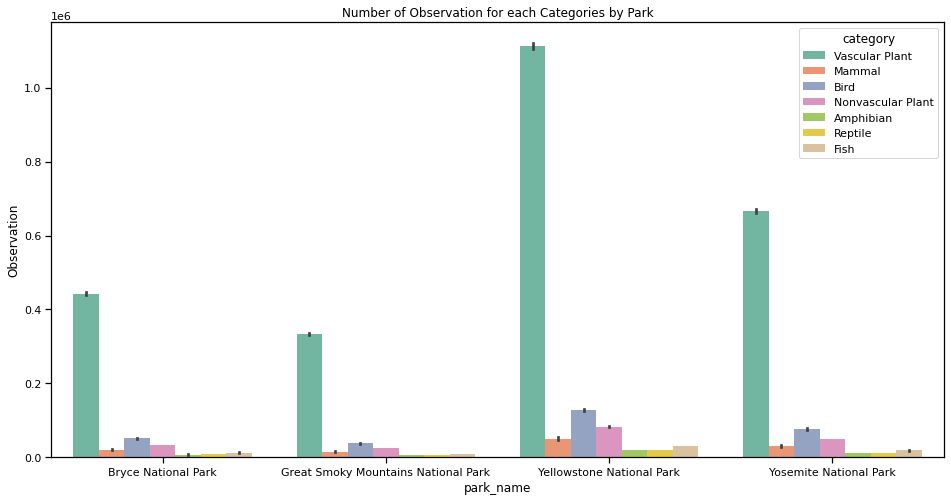

In [35]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('Set2')
sns.set_context('notebook')

plt.figure(figsize=(16,8))
sns.barplot(x='park_name', y='Observation', data= observation, hue='category', estimator=np.sum, order=order)
plt.title('Number of Observation for each Categories by Park')

### What is the category with biggest observation by park?

Text(0.5, 1.0, 'Number of Observation for each Park by Category')

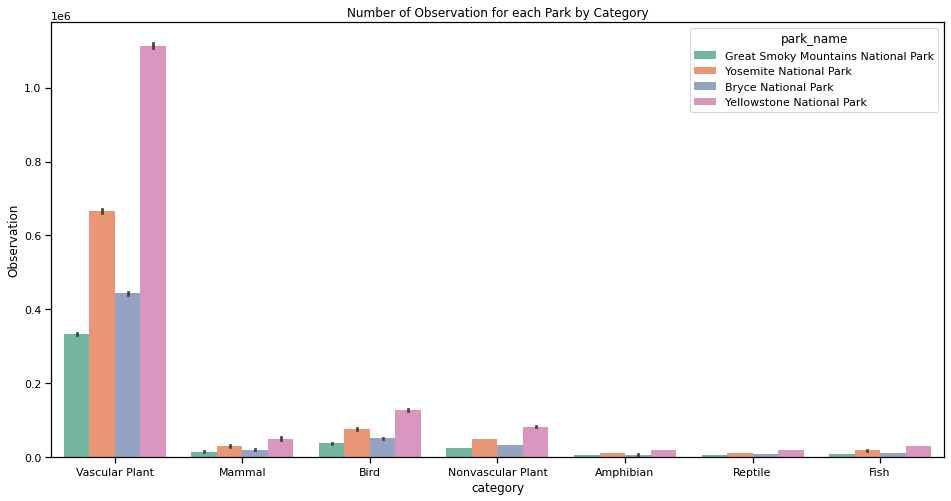

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(x='category', y='Observation', data=observation, hue='park_name', estimator=np.sum)
plt.title('Number of Observation for each Park by Category')

## How is the Coservation by Park? 

Text(0.5, 1.0, 'Number of Observation for each Consevation Status by Park')

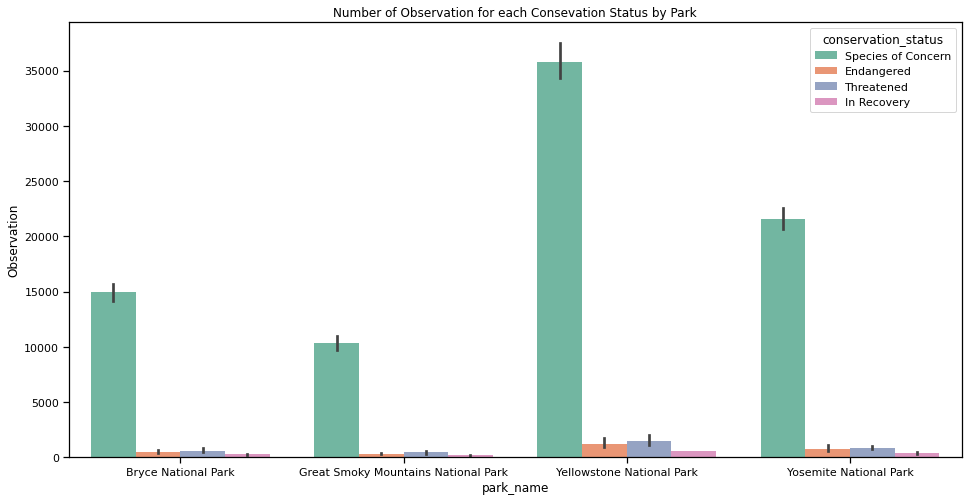

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(x='park_name', y='Observation', data=observation, hue='conservation_status', estimator=np.sum, order = order)
plt.title('Number of Observation for each Consevation Status by Park')

## How is the Distribution of the Observation by Conservation Status?

Text(0.5, 1.0, 'Distribution of Observation by Conservation Status')

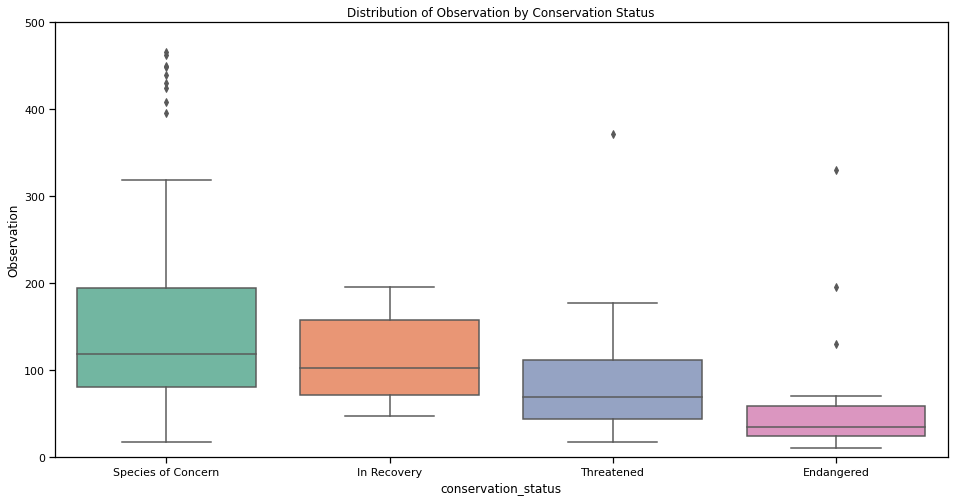

In [41]:
fig = plt.figure(figsize = (16,8))
order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x = 'conservation_status', y = 'Observation', data = observation, order = order)
plt.ylim(0, 500)
plt.title('Distribution of Observation by Conservation Status')

## Which Category most often receive Conservation Status?

In [42]:
under_protection = observation[observation.conservation_status.notna()].category.value_counts().reset_index()
under_protection = under_protection.rename(columns = {'index': 'category', 'category': 'under protection'})
under_protection

,category,under protection
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28
5,Reptile,20
6,Nonvascular Plant,20


Text(0.5, 1.0, 'Number of Protected Species by Category')

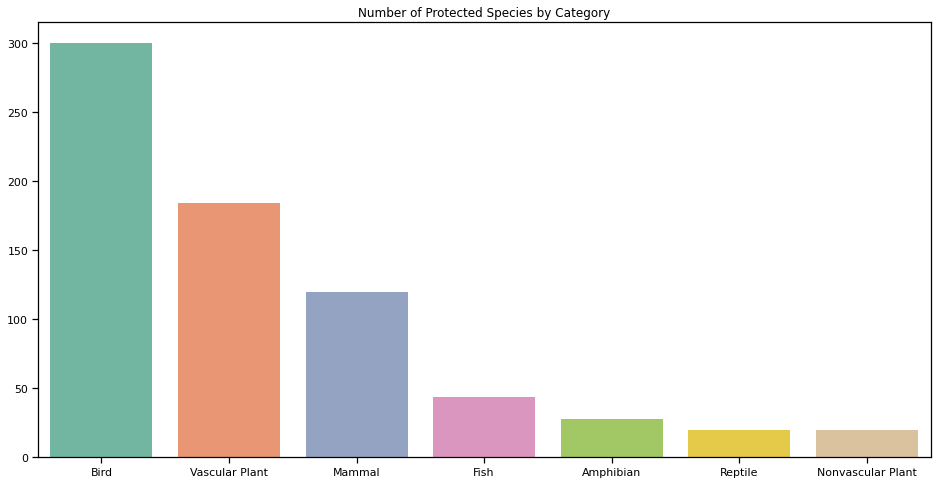

In [43]:
plt.figure(figsize=(16,8))
sns.barplot(x='category', y='under protection', data = under_protection)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Protected Species by Category')

## What is the percentage of protected species from the total number?

In [45]:
total_amount = observation.category.value_counts().reset_index().rename(columns={'index':'category', 'category':'total amount'})
total_amount

,category,total amount
0,Vascular Plant,17048
1,Bird,1952
2,Nonvascular Plant,1332
3,Mammal,704
4,Fish,500
5,Amphibian,316
6,Reptile,312


In [48]:
under_protection = under_protection.merge(total_amount)
under_protection['proportion%'] = round(under_protection['under protection']/under_protection['total amount']*100, 2)
under_protection

,category,under protection,total amount,proportion%
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Reptile,20,312,6.41
6,Nonvascular Plant,20,1332,1.50


Text(0.5, 1.0, 'Proportions of Protected Species by Category')

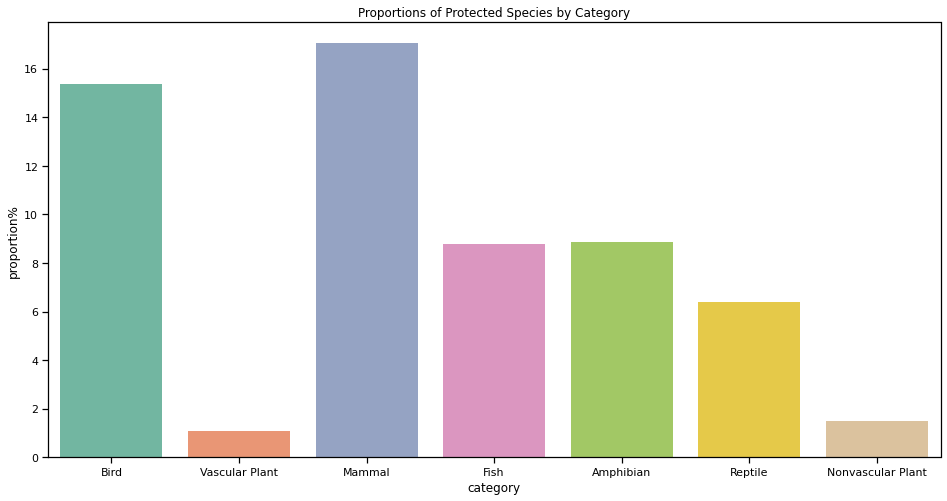

In [49]:
plt.figure(figsize=(16,8))
sns.barplot(x='category', y='proportion%', data=under_protection)
plt.ylabel('proportion%')
plt.title('Proportions of Protected Species by Category')

## How many Species belong to each Category by Conservation Status? 

Text(0.5, 1.0, 'Number of Species by category by Conservation Status')

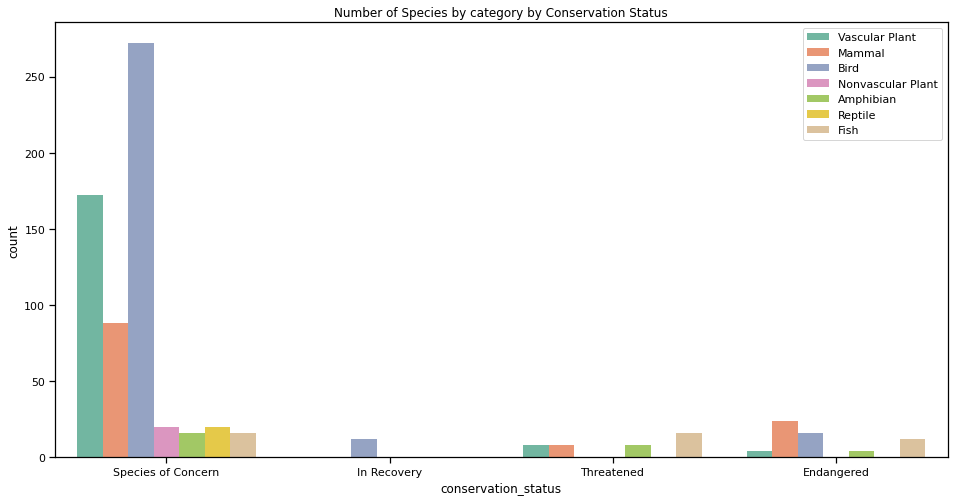

In [50]:
plt.figure(figsize=(16,8))
sns.countplot(x='conservation_status', data = observation, hue='category', order = order)
plt.legend(loc = 'upper right')
plt.title('Number of Species by category by Conservation Status')

## How many species belong to each conservation status by category?

Text(0.5, 1.0, 'Number of Species by Conservation Status by Category')

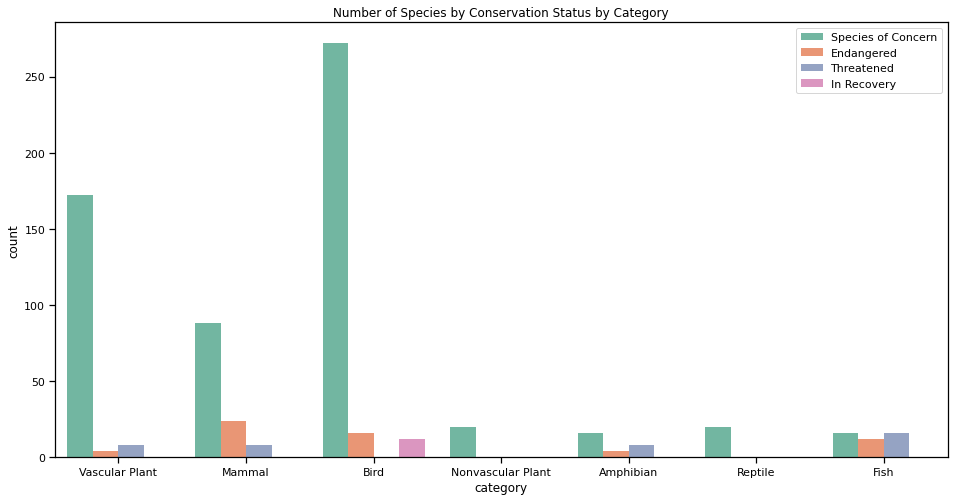

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(x='category', data = observation, hue='conservation_status')
plt.legend(loc= 'upper right')
plt.title('Number of Species by Conservation Status by Category')

## Summary

So far we had perform lots of operations over the dataset to dig out some very usefull information from it. If, we had to conlclude the dataset in few lines, than we can say that:

1.   The category with the biggest observation
2.   The park with the biggest observation by category
1.   The category with biggest observation by park
2.   The Coservation by Park
1.   The Distribution of the Observation by Conservation Status
2.   Category most often receive Conservation Status
1.   The percentage of protected species from the total number
2.   Species belong to each Category by Conservation Status
1.   Species belong to each conservation status by category


